# Application of Linear Regression on Swedish Auto Insurance Dataset

The Swedish Auto Insurance Dataset involves predicting the total payment for all claims in thousands of Swedish Kronor, given the total number of claims.

It is a regression problem. It is comprised of 63 observations with 1 input variable and one output variable. The variable names are as follows:

*Number of claims.
*Total payment for all claims in thousands of Swedish Kronor.

In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import  metrics
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from lcp import plot_learning_curve
from sklearn.cross_validation import KFold

%matplotlib inline

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [7]:
df = pd.read_csv('auto_insurance_sweden.csv')

# Lets display the top 5 records in the Dataset
print (df.head())

     X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4


In [8]:
# Checking data type of columns and if any NULL values are present
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
X    63 non-null int64
Y    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
None


In [9]:
# Displaying basic stats for the columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,63.0,22.904762,23.351946,0.0,7.50,14.0,29.0,124.0
Y,63.0,98.187302,87.327553,0.0,38.85,73.4,140.0,422.2


## Visualization using seaborn and matplotlib

Plotting the distribution of the feature and label from the Dataset.

We can see that the distributions have approximately the same shape which indicates that there is a strong linear relationship between the feature and label.

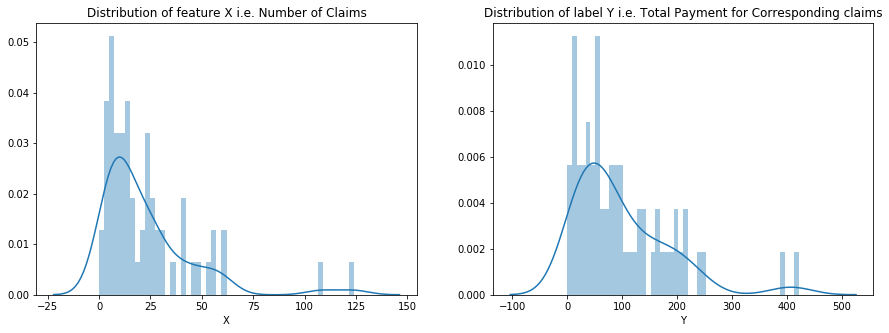

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.set_title('Distribution of feature X i.e. Number of Claims')
sns.distplot(df.X,bins=50,ax=ax1)

ax2.set_title('Distribution of label Y i.e. Total Payment for Corresponding claims')
sns.distplot(df.Y,bins=50,ax=ax2)

Boxplot and Violinplot gives us the quartile distribution of the feature and check for outliers.

We can see two extreme values but we will include them in our analysis.

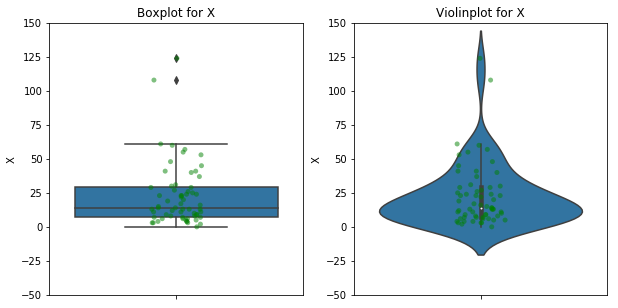

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.set_ylim(-50,150)
ax1.set_title('Boxplot for X')
sns.boxplot(y='X',data=df,ax=ax1,)
sns.stripplot(y='X',color='green',data=df,jitter=True,ax=ax1,alpha=0.5)

ax2.set_ylim(-50,150)
ax2.set_title('Violinplot for X')
sns.violinplot(y='X',data=df,ax=ax2)
sns.stripplot(y='X',color='green',data=df,jitter=True,ax=ax2,alpha=0.5)

This displays the scatter plot for Feature and Label and fits an approximate regression line for the same.

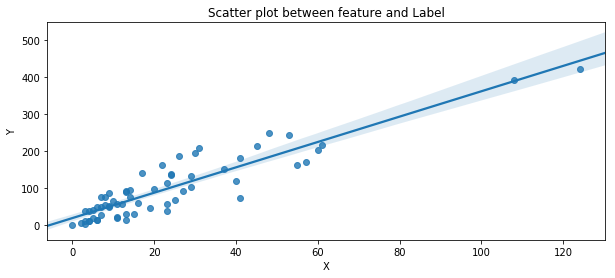

In [13]:
fig , (ax1) = plt.subplots(1,1,figsize=(10,4))

ax1.set_title('Scatter plot between feature and Label')
sns.regplot(data=df,x='X',y='Y',ax=ax1)

## Training Linear Regression Model

Here we will train the Linear Regression model from scikit-learn and check the RMSE for the Training Data itself.

In [16]:
X = pd.DataFrame(df.X)
Y = df.Y
regr = linear_model.LinearRegression()
regr.fit(X,Y)
Y_pred = regr.predict(X)
mse = metrics.mean_squared_error(Y_pred,Y)
print ('RMSE for Training set : %f' % (np.sqrt(mse)))

RMSE for Training set : 35.365830


Checking mean RMSE after cross validation

In [18]:
regr_cv = linear_model.LinearRegression()
scores = cross_val_score(regr_cv,X,Y,cv=10,scoring='mean_squared_error')
scores = scores*-1
print ('Mean RMSE for Cross Validation : %f' % (np.mean(np.sqrt(scores))))

NameError: name 'cross_val_score' is not defined

Splitting the dataset in Train and Test Sets.

Below Scatter plot will show the distribution of training and testing samples..

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter plot showing train and test sample split')
ax.scatter(X_train,Y_train,marker='*',label='Train')
ax.scatter(X_test,Y_test,c='red',label='Test')

NameError: name 'train_test_split' is not defined

Train the model on the training set and predict the label values for the testing set.

Looking at the RMSE for testing set.

In [23]:
regr_fin = linear_model.LinearRegression()
regr_fin.fit(X_train,Y_train)
Y_pred = regr_fin.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(Y_pred,Y_test))
print ('RMSE for Testing set : %f' % (rmse))

NameError: name 'X_train' is not defined

Using the coefficient from generated by the model we can plot the regression line on the scatter plot.

We can observe that this closely approximates the data and regression line from the seaborn reg_plot is almost similar to it.

In [24]:
x = range(0,X.max())
y = x*regr.coef_

fig, (ax,ax1) = plt.subplots(1,2,figsize=(12,6))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Plot for Regression line fit on Train and Test data')
ax.scatter(X_train,Y_train,marker='*',label='Train')
ax.scatter(X_test,Y_test,c='red',label='Test')
ax.legend()
ax.plot(x,y,c='black')

ax1.set_title('Scatter plot between feature and Label')
ax1.set_ylim(-100,500)
sns.regplot(data=df,x='X',y='Y',ax=ax1)

TypeError: 'Series' object cannot be interpreted as an integer

## Analysing the learing curve for the model

I have written the below function to plot the learning curves for given model and step_size to increase number of samples it will be using 3 fold cross validation to calculate the cross validation error.

In [26]:
def plot_learning_curve(estimator, title, X, y, ylim=None, n_jobs=1,sample_steps = 5):
    df_train = X.join(y)
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    J_train = []
    J_cv = []
    train_sizes = []
    sample_div = len(X) / sample_steps
    cvin = 0

    for i in range(1,sample_steps):
        
        num_samples = sample_div*i
        train_sizes.append(num_samples)
        
        df_temp = df_train.sample(num_samples,replace=False,random_state=42)
        estimator.fit(pd.DataFrame(df_temp.X),df_temp.Y)
        Y_pred = estimator.predict(pd.DataFrame(df_temp.X))  
        J_train.append(np.sqrt(metrics.mean_squared_error(Y_pred,df_temp.Y)))
        
        scores = cross_val_score(estimator,pd.DataFrame(df_temp.X),df_temp.Y,cv=3,scoring='mean_squared_error')
        J_cv.append(np.mean(np.sqrt(scores*-1)))

    train_scores_mean = np.mean(J_train)
    train_scores_std = np.std(J_train)
    test_scores_mean = np.mean(J_cv)
    test_scores_std = np.std(J_cv)

    plt.grid()

    plt.plot(train_sizes, J_train, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, J_cv, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


ValueError: Only integers accepted as `n` values

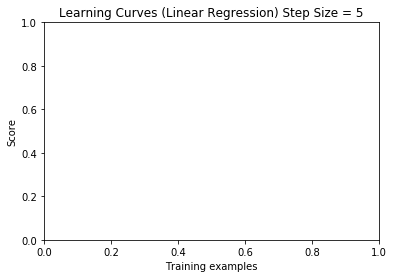

In [28]:
estimator = linear_model.LinearRegression()

title = "Learning Curves (Linear Regression) Step Size = 5"
plot_learning_curve(estimator, title, X, Y, n_jobs=4,sample_steps = 5)

title = "Learning Curves (Linear Regression) Step Size = 12"
plot_learning_curve(estimator, title, X, Y, n_jobs=4,sample_steps = 12)

We can observe from the above curves that when the sample size is less the difference between Training and cross validation error is high and as the number of training samples increases the difference between the errors reduces to a point where they are almost similar.